                                 Payment-Date Prediction Model

In [1]:
### importing all the necesary libraries ###

In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data2=pd.read_csv("C:/Users/KIIT/Downloads/1828218 - 1828218.csv")

In [5]:
data2.shape

(50000, 19)

In [6]:
data2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR trust,2019-09-06 0:00:00,2019,1929793448,2019-08-27,20190826,20190827,20190911,USD,RV,1,NaN,15579.05,20190827,NAH4,1.929793e+09,0
1,U001,200769623,WAL-MAR corp,2019-08-27 0:00:00,2019,1929757811,2019-08-17,20190817,20190817,20190901,USD,RV,1,NaN,18373.14,20190817,NAH4,1.929758e+09,0
2,U001,200803720,DEC associates,2020-02-03 0:00:00,2020,1930435442,2020-01-24,20200124,20200124,20200208,USD,RV,1,NaN,264.72,20200116,NAM4,1.930435e+09,0
3,U001,200769623,WAL-MAR associates,2019-08-20 0:00:00,2019,1929724790,2019-08-09,20190808,20190809,20190824,USD,RV,1,NaN,20919.82,20190809,NAH4,1.929725e+09,0
4,U001,100031704,DELHAIZE foundation,2019-05-08 0:00:00,2019,1929182011,2019-04-22,20190420,20190422,20190507,USD,RV,1,NaN,123284.82,20190422,NAA8,1.929182e+09,0


In [7]:
data2.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3812
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

In [8]:
data2.posting_id.value_counts()

1    50000
Name: posting_id, dtype: int64

In [9]:
### removing constant columns and name_customer column as it can be identified by its cust_number ### 
df1=data2.drop(['name_customer','posting_date','document_create_date','posting_id','area_business'],axis=1)

In [10]:
df1.columns

Index(['business_code', 'cust_number', 'clear_date', 'buisness_year', 'doc_id',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [11]:
### creating a new dataframe for the values having null in clear_date column and this is our TEST SET ###
test=df1[df1['clear_date'].isnull()]  

In [12]:
### creating a new dataframe for the values not having null in clear_date column ###
train_set=df1[~df1['clear_date'].isnull()]             

In [13]:
print(test.shape)
print(train_set.shape)

(3812, 14)
(46188, 14)


In [14]:
train_set.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,2019-09-06 0:00:00,2019,1929793448,20190827,20190911,USD,RV,15579.05,20190827,NAH4,1.929793e+09,0
1,U001,200769623,2019-08-27 0:00:00,2019,1929757811,20190817,20190901,USD,RV,18373.14,20190817,NAH4,1.929758e+09,0
2,U001,200803720,2020-02-03 0:00:00,2020,1930435442,20200124,20200208,USD,RV,264.72,20200116,NAM4,1.930435e+09,0
3,U001,200769623,2019-08-20 0:00:00,2019,1929724790,20190809,20190824,USD,RV,20919.82,20190809,NAH4,1.929725e+09,0
4,U001,100031704,2019-05-08 0:00:00,2019,1929182011,20190422,20190507,USD,RV,123284.82,20190422,NAA8,1.929182e+09,0


In [15]:
train_set.isnull().sum()

business_code             0
cust_number               0
clear_date                0
buisness_year             0
doc_id                    0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                4
isOpen                    0
dtype: int64

In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46188 entries, 0 to 46187
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           46188 non-null  object 
 1   cust_number             46188 non-null  object 
 2   clear_date              46188 non-null  object 
 3   buisness_year           46188 non-null  int64  
 4   doc_id                  46188 non-null  int64  
 5   document_create_date.1  46188 non-null  int64  
 6   due_in_date             46188 non-null  int64  
 7   invoice_currency        46188 non-null  object 
 8   document type           46188 non-null  object 
 9   total_open_amount       46188 non-null  float64
 10  baseline_create_date    46188 non-null  int64  
 11  cust_payment_terms      46188 non-null  object 
 12  invoice_id              46184 non-null  float64
 13  isOpen                  46188 non-null  int64  
dtypes: float64(2), int64(6), object(6)
mem

In [17]:
### changing datatype of date columns in str ###
train_set[['document_create_date.1','due_in_date','baseline_create_date','clear_date']]=train_set[['document_create_date.1','due_in_date','baseline_create_date','clear_date']].astype(str)

In [18]:
### converting date columns to datetime
train_set[['document_create_date.1','due_in_date','baseline_create_date']] = train_set[['document_create_date.1','due_in_date','baseline_create_date']].apply(pd.to_datetime,format='%Y%m%d')
train_set['clear_date']=pd.to_datetime(train_set['clear_date'])

In [19]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46188 entries, 0 to 46187
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           46188 non-null  object        
 1   cust_number             46188 non-null  object        
 2   clear_date              46188 non-null  datetime64[ns]
 3   buisness_year           46188 non-null  int64         
 4   doc_id                  46188 non-null  int64         
 5   document_create_date.1  46188 non-null  datetime64[ns]
 6   due_in_date             46188 non-null  datetime64[ns]
 7   invoice_currency        46188 non-null  object        
 8   document type           46188 non-null  object        
 9   total_open_amount       46188 non-null  float64       
 10  baseline_create_date    46188 non-null  datetime64[ns]
 11  cust_payment_terms      46188 non-null  object        
 12  invoice_id              46184 non-null  float6

In [20]:
### making a target variable column delay in the dataset
train_set['delay']=(train_set['clear_date']-train_set['due_in_date']).dt.days

In [21]:
train_set.columns

Index(['business_code', 'cust_number', 'clear_date', 'buisness_year', 'doc_id',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'invoice_id', 'isOpen', 'delay'],
      dtype='object')

In [22]:
### dropping duplicate rows if present in dataframe
train_set.drop_duplicates(keep='first',inplace=True)

In [23]:
#sorted the dataframe on the basis of column document_create_date.1
train_set.sort_values('document_create_date.1',inplace=True)
train_set.reset_index(drop=True,inplace=True)                                 

In [24]:
train_set.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,200769623,2019-01-09,2019,1928539293,2018-12-30,2019-01-14,USD,RV,4763.88,2018-12-30,NAH4,1.928539e+09,0,-5
1,U001,200726979,2019-01-15,2019,1928541862,2018-12-30,2019-01-14,USD,RV,185.10,2018-12-30,NAA8,1.928542e+09,0,1
2,U001,200769623,2019-01-17,2019,1928540012,2018-12-30,2019-01-14,USD,RV,12202.50,2018-12-30,NAH4,1.928540e+09,0,3
3,U001,200769623,2019-01-10,2019,1928540265,2018-12-30,2019-01-14,USD,RV,311.84,2018-12-30,NAH4,1.928540e+09,0,-4
4,U001,200769623,2019-01-09,2019,1928540652,2018-12-30,2019-01-14,USD,RV,14599.04,2018-12-30,NAH4,1.928541e+09,0,-5


In [25]:
train_set.isnull().sum()

business_code             0
cust_number               0
clear_date                0
buisness_year             0
doc_id                    0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                4
isOpen                    0
delay                     0
dtype: int64

In [26]:
### checking if the invoice_id or doc_id are equal ###

In [27]:
bigdata=train_set.copy()

In [28]:
pd.Series(bigdata['invoice_id']==bigdata['doc_id']).value_counts()

True     46184
False        4
dtype: int64

In [29]:
temp5=bigdata.copy()

In [30]:
temp5.dropna(axis=0,how='any',inplace=True)

In [31]:
#### all the rows of doc_id and invoice_id are same
pd.Series(temp5['doc_id']==temp5['invoice_id']).value_counts()              

True    46184
dtype: int64

In [32]:
#since column named doc_id and invoice_id are same we can remove invoice_id
bigdata.drop(['invoice_id'],axis=1,inplace=True)

In [33]:
bigdata.columns

Index(['business_code', 'cust_number', 'clear_date', 'buisness_year', 'doc_id',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'isOpen', 'delay'],
      dtype='object')

In [34]:
### checking for any anomaly ###

In [35]:
def anomaly(x):
    return len(x.index)/len(bigdata.index)*100

In [36]:
x1=bigdata[~(bigdata['document_create_date.1']<=bigdata['baseline_create_date'])]
x2=bigdata[~(bigdata['baseline_create_date']<bigdata['due_in_date'])]
x3=bigdata[~(bigdata['due_in_date']<=bigdata['clear_date'])]

In [37]:
print(anomaly(x1))
print(anomaly(x2))
print(anomaly(x3))

4.475188360613147
1.3943015501861955
36.838572789469126


In [38]:
'''
after getting anomaly % between document_create_date.1 and baseline_create_date ,baseline_create_date and  due_in_date
, due_in_date and clear_date we found that anomaly % is very less between document_create_date.1 and baseline_create_date,
baseline_create_date and  due_in_date,so we can remove those rows

'''

'\nafter getting anomaly % between document_create_date.1 and baseline_create_date ,baseline_create_date and  due_in_date\n, due_in_date and clear_date we found that anomaly % is very less between document_create_date.1 and baseline_create_date,\nbaseline_create_date and  due_in_date,so we can remove those rows\n\n'

In [39]:
# copying bigdata dataframe into data #
data=bigdata.copy()

In [40]:
### deleting the rows by calculating anomaly(only x1 and x2) ###
data=data[(data['document_create_date.1']<=data['baseline_create_date'])]
data=data[data['baseline_create_date']<data['due_in_date']]

In [41]:
print(bigdata.shape)
print(x1.shape)
print(x2.shape)
print(data.shape)

(46188, 14)
(2067, 14)
(644, 14)
(43477, 14)


In [42]:
data.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,200769623,2019-01-09,2019,1928539293,2018-12-30,2019-01-14,USD,RV,4763.88,2018-12-30,NAH4,0,-5
1,U001,200726979,2019-01-15,2019,1928541862,2018-12-30,2019-01-14,USD,RV,185.10,2018-12-30,NAA8,0,1
2,U001,200769623,2019-01-17,2019,1928540012,2018-12-30,2019-01-14,USD,RV,12202.50,2018-12-30,NAH4,0,3
3,U001,200769623,2019-01-10,2019,1928540265,2018-12-30,2019-01-14,USD,RV,311.84,2018-12-30,NAH4,0,-4
4,U001,200769623,2019-01-09,2019,1928540652,2018-12-30,2019-01-14,USD,RV,14599.04,2018-12-30,NAH4,0,-5


In [43]:
### encoding the categorical columns ###

In [44]:
label_encoder=preprocessing.LabelEncoder()

In [45]:
data['business_code']=label_encoder.fit_transform(data['business_code'])
data['invoice_currency']=label_encoder.fit_transform(data['invoice_currency'])
data['document type']=label_encoder.fit_transform(data['document type'])
data['cust_payment_terms']=label_encoder.fit_transform(data['cust_payment_terms'])
data['cust_number']=label_encoder.fit_transform(data['cust_number'])

In [46]:
data.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,1,844,2019-01-09,2019,1928539293,2018-12-30,2019-01-14,1,0,4763.88,2018-12-30,32,0,-5
1,1,746,2019-01-15,2019,1928541862,2018-12-30,2019-01-14,1,0,185.10,2018-12-30,20,0,1
2,1,844,2019-01-17,2019,1928540012,2018-12-30,2019-01-14,1,0,12202.50,2018-12-30,32,0,3
3,1,844,2019-01-10,2019,1928540265,2018-12-30,2019-01-14,1,0,311.84,2018-12-30,32,0,-4
4,1,844,2019-01-09,2019,1928540652,2018-12-30,2019-01-14,1,0,14599.04,2018-12-30,32,0,-5


In [47]:
df3=data.copy()

In [48]:
### extracting week,month and year from due_in_date,document_create_date.1,baseline_create_date ###

In [49]:
df3['due_week']=df3['due_in_date'].dt.week
df3['due_month']=df3['due_in_date'].dt.month
df3['due_year']=df3['due_in_date'].dt.year

df3['doc_create_week']=df3['document_create_date.1'].dt.week
df3['doc_create_month']=df3['document_create_date.1'].dt.month
df3['doc_create_year']=df3['document_create_date.1'].dt.year

df3['baseline_create_week']=df3['baseline_create_date'].dt.week
df3['baseline_create_month']=df3['baseline_create_date'].dt.month
df3['baseline_create_year']=df3['baseline_create_date'].dt.year

In [50]:
df3.reset_index(drop=True,inplace=True)

In [51]:
df3.iloc[0]

business_code                               1
cust_number                               844
clear_date                2019-01-09 00:00:00
buisness_year                            2019
doc_id                             1928539293
document_create_date.1    2018-12-30 00:00:00
due_in_date               2019-01-14 00:00:00
invoice_currency                            1
document type                               0
total_open_amount                     4763.88
baseline_create_date      2018-12-30 00:00:00
cust_payment_terms                         32
isOpen                                      0
delay                                      -5
due_week                                    3
due_month                                   1
due_year                                 2019
doc_create_week                            52
doc_create_month                           12
doc_create_year                          2018
baseline_create_week                       52
baseline_create_month             

In [52]:
df3.iloc[len(df3.index)-1]

business_code                               1
cust_number                               921
clear_date                2020-03-12 00:00:00
buisness_year                            2020
doc_id                             1930573838
document_create_date.1    2020-02-27 00:00:00
due_in_date               2020-03-13 00:00:00
invoice_currency                            1
document type                               0
total_open_amount                     8793.09
baseline_create_date      2020-02-27 00:00:00
cust_payment_terms                         22
isOpen                                      0
delay                                      -1
due_week                                   11
due_month                                   3
due_year                                 2020
doc_create_week                             9
doc_create_month                            2
doc_create_year                          2020
baseline_create_week                        9
baseline_create_month             

In [53]:
df3.shape

(43477, 23)

In [54]:
df4=df3.copy()

In [55]:
### getting document_create_date.1 at 1st and last index to split our dataset on the basis of time ###
print(df4['document_create_date.1'].iloc[0])
print(df4['document_create_date.1'].iloc[len(df4.index)-1])

2018-12-30 00:00:00
2020-02-27 00:00:00


In [56]:
#SPLITTING THE DATA INTO TRAIN AND VALIDATION SETS
validation1=df4[df4['document_create_date.1']>='2020-1-22'].copy()
validation1.reset_index(drop=True,inplace=True)

In [57]:
validation2=df4[df4['document_create_date.1']>='2019-12-2'].copy()
validation2=validation2[validation2['document_create_date.1']<'2020-1-22'].copy()
validation2.reset_index(drop=True,inplace=True)

In [58]:
validation2['document_create_date.1'].iloc[0]

Timestamp('2019-12-02 00:00:00')

In [59]:
train_data=df4[df4['document_create_date.1']<'2019-12-02'].copy()
train_data.reset_index(drop=True,inplace=True)

In [60]:
train_data.shape

(36087, 23)

In [61]:
### since we can't give datetime format in our model so after extracting it's week,month and year we can drop those dates ###
df5=train_data.drop(['clear_date','document_create_date.1','baseline_create_date','due_in_date'],axis=1)
valid1=validation1.drop(['clear_date','document_create_date.1','baseline_create_date','due_in_date'],axis=1)
valid2=validation2.drop(['clear_date','document_create_date.1','baseline_create_date','due_in_date'],axis=1)

In [62]:
print(df5.shape)
print(valid1.shape)
print(valid2.shape)

(36087, 19)
(3631, 19)
(3759, 19)


In [63]:
   # EDA(Exploratory Data Analysis) #####

In [64]:
correlation=df5.corr()
correlation['delay']

business_code           -0.016247
cust_number             -0.068837
buisness_year                 NaN
doc_id                   0.184920
invoice_currency        -0.173344
document type            0.066451
total_open_amount        0.026299
cust_payment_terms      -0.178767
isOpen                        NaN
delay                    1.000000
due_week                -0.041762
due_month               -0.041986
due_year                -0.039082
doc_create_week         -0.031128
doc_create_month        -0.030424
doc_create_year         -0.003023
baseline_create_week    -0.030327
baseline_create_month   -0.029516
baseline_create_year    -0.001844
Name: delay, dtype: float64

<AxesSubplot:>

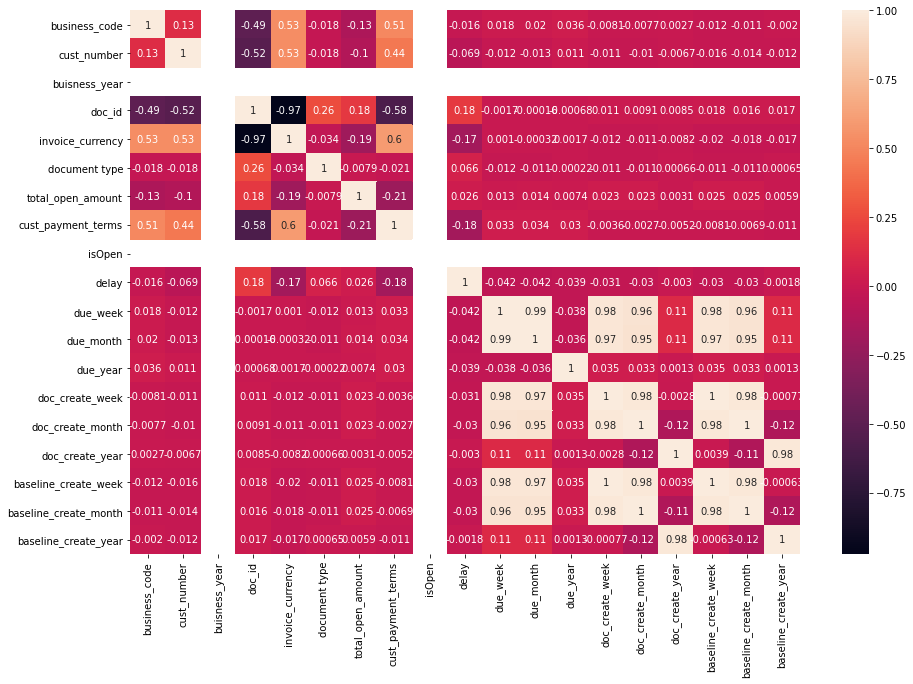

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)


In [67]:
'''
    After observing heatmap we found that there is no correlation of target variable on business_year and isOpen column so
    we can drop those columns.
'''

'\n    After observing heatmap we found that there is no correlation of target variable on business_year and isOpen column so\n    we can drop those columns.\n'

In [68]:
### dropped these two columns as no correlation found with target variable and it is also constant ###
df5.drop(['buisness_year','isOpen'],axis=1,inplace=True)

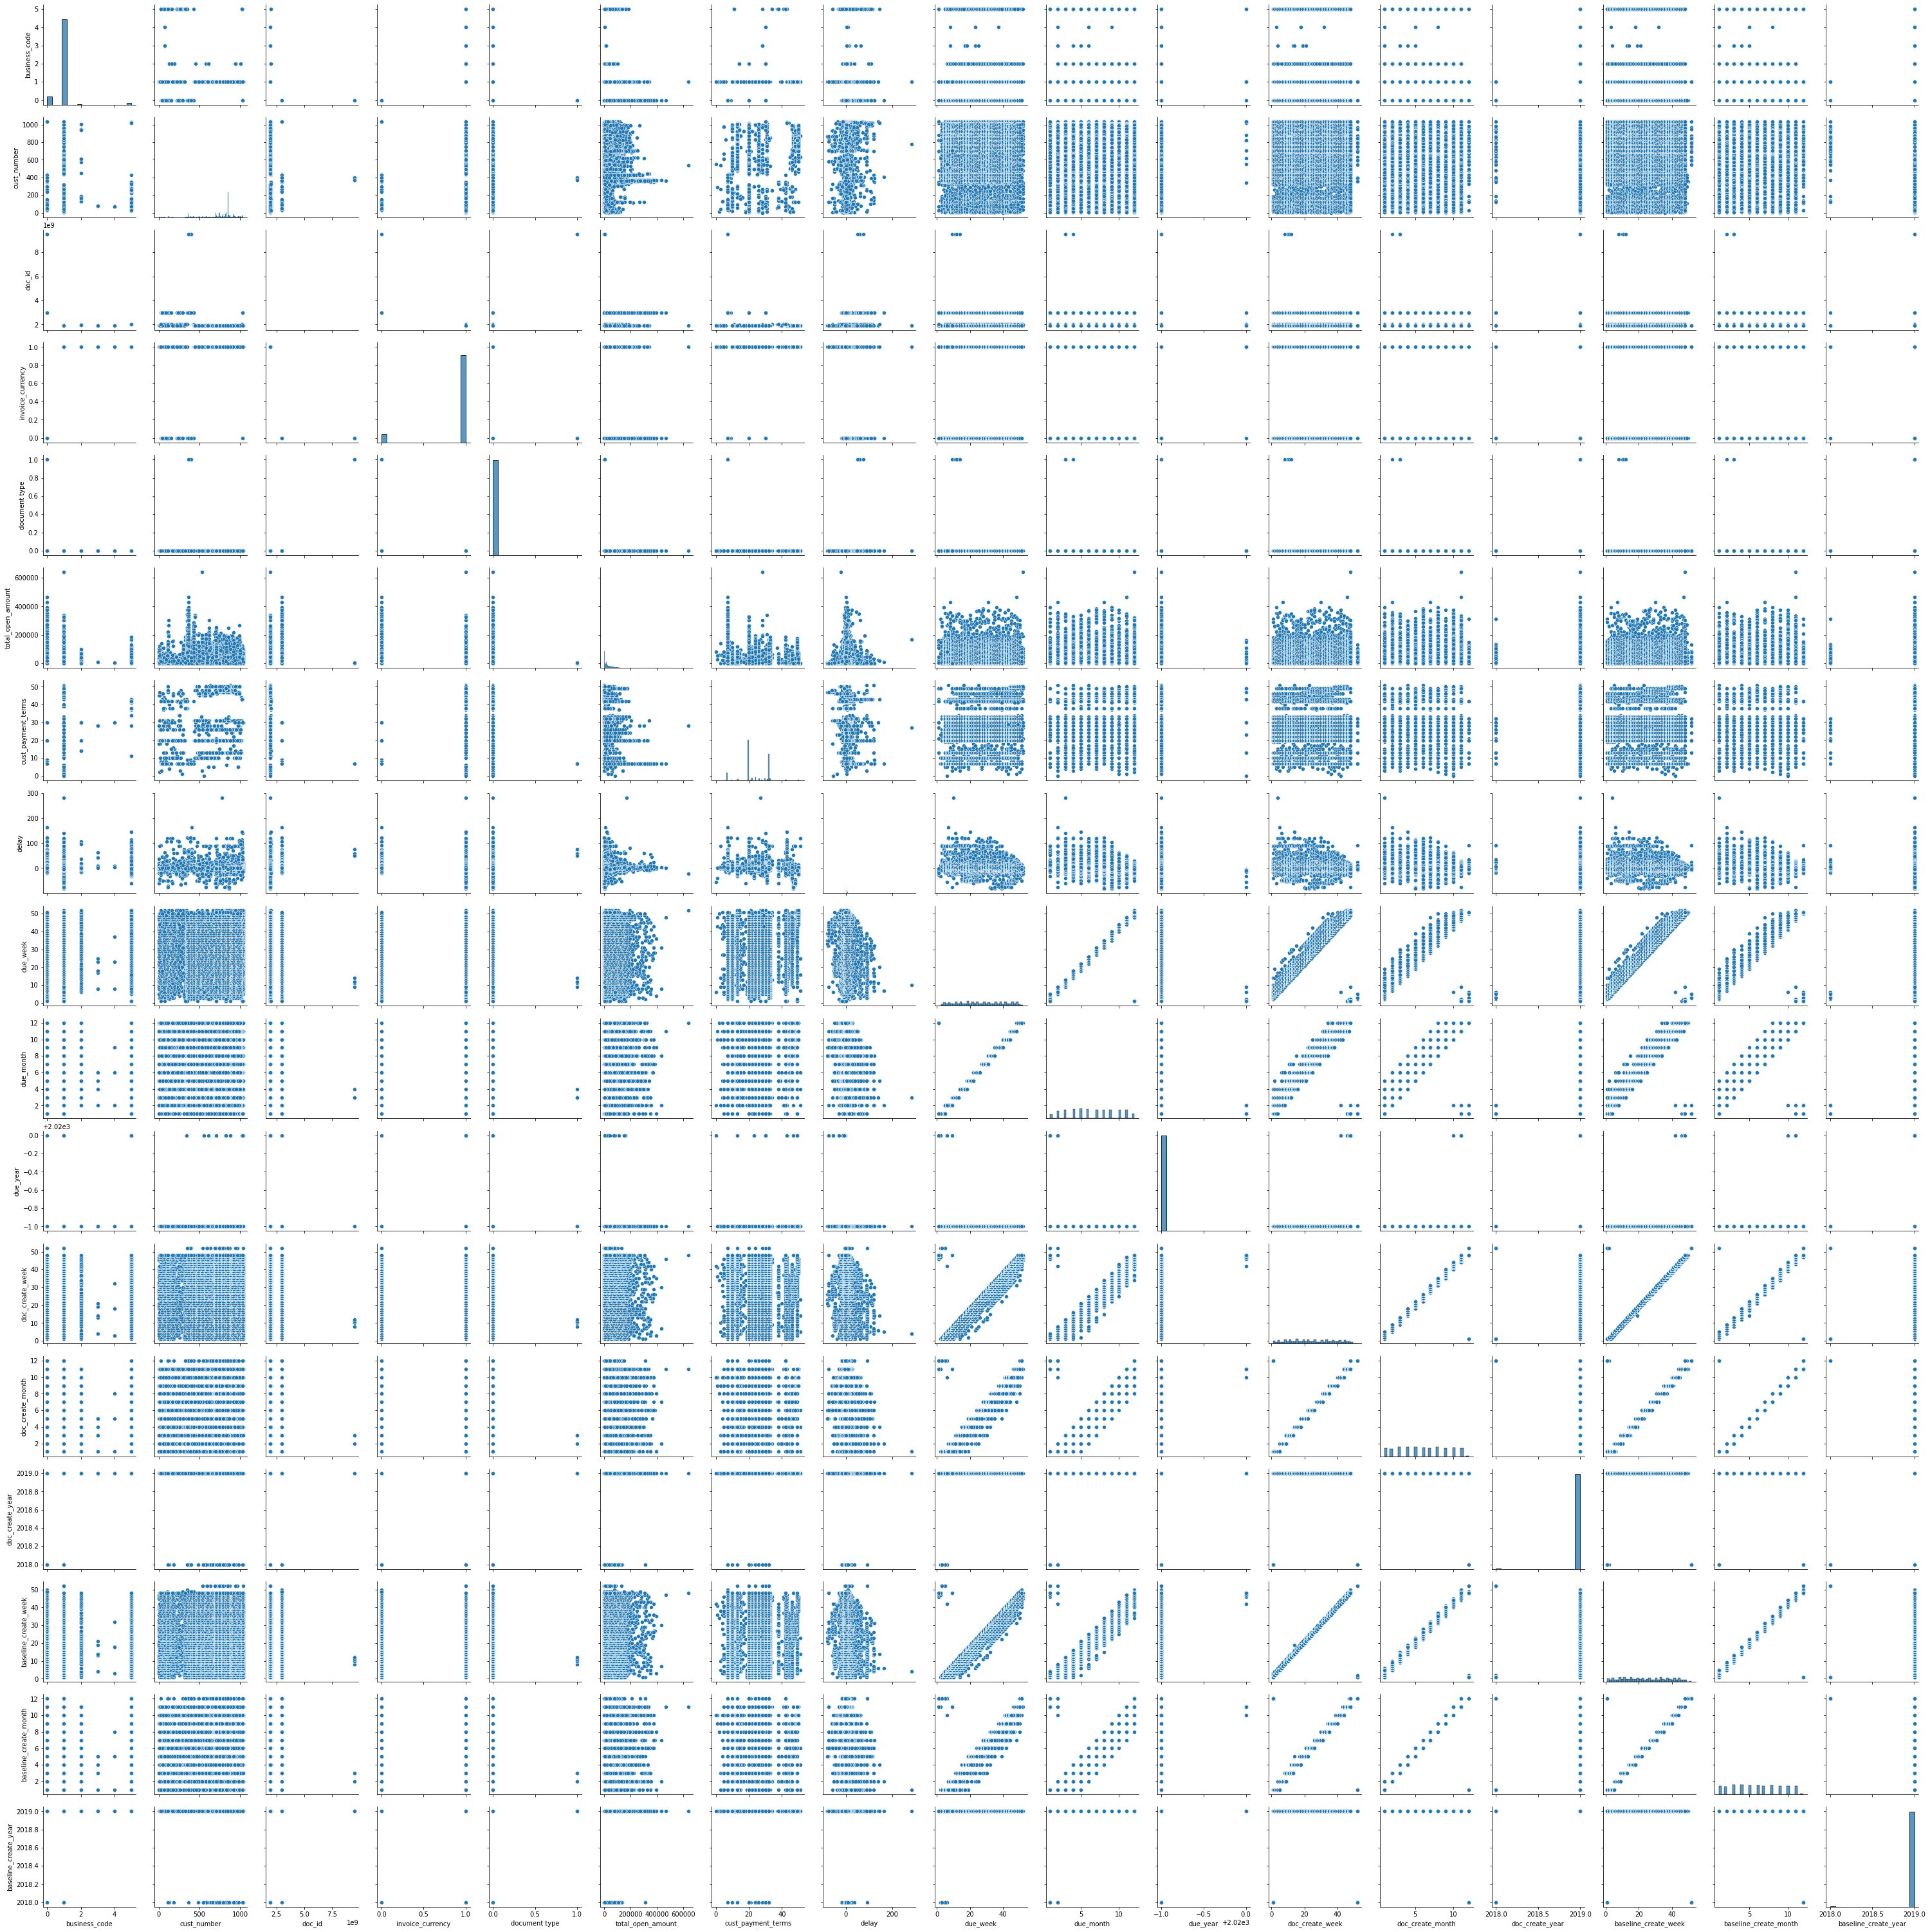

In [69]:
sns.pairplot(df5)

In [70]:
### can't visualize anything clearly from pairplot ###

In [71]:
### dropped business_year and isOpen from valid1 and valid2 too.  ###
valid1.drop(['buisness_year','isOpen'],axis=1,inplace=True)
valid2.drop(['buisness_year','isOpen'],axis=1,inplace=True)

<AxesSubplot:xlabel='business_code', ylabel='Count'>

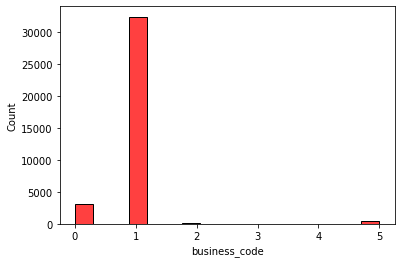

In [73]:
sns.histplot(data=df5,x='business_code',color='red')

In [74]:
'''
    After plotting histogram for business_code we observe that businsee_code of value 3 and 4 are almost negligible so we can 
    join them to make a single value .
    '''

'\n    After plotting histogram for business_code we observe that businsee_code of value 3 and 4 are almost negligible so we can \n    join them to make a single value .\n    '

In [75]:
df5.business_code.value_counts()

1    32373
0     3094
5      513
2       96
3        7
4        4
Name: business_code, dtype: int64

In [76]:
## replacing business_code of value 4 to 3 ##
df5['business_code'].replace({4:3},inplace=True)

In [77]:
df5.business_code.value_counts()

1    32373
0     3094
5      513
2       96
3       11
Name: business_code, dtype: int64

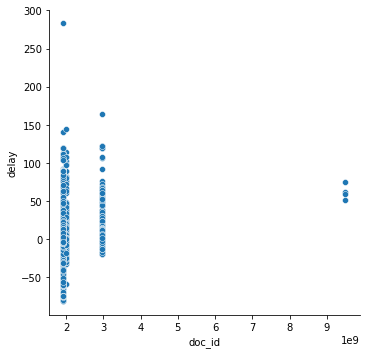

In [78]:
sns.relplot(df5['doc_id'],df5['delay'],data=df5)

In [79]:
df5.drop('doc_id',axis=1,inplace=True)
valid1.drop('doc_id',axis=1,inplace=True)
valid2.drop('doc_id',axis=1,inplace=True)

In [80]:
'''
    Dropped doc_id as it have a very strong positive correlation with delay but we don't need it.
    Example:Suppose to know the resale value of car we don't need to get its number plate number
'''
    

"\n    Dropped doc_id as it have a very strong positive correlation with delay but we don't need it.\n    Example:Suppose to know the resale value of car we don't need to get its number plate number\n"

<AxesSubplot:xlabel='cust_number', ylabel='delay'>

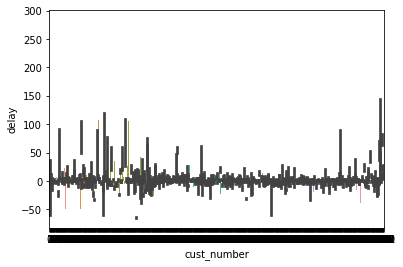

In [81]:
sns.barplot(x=df5.cust_number,y=df5.delay,data=df5)

<AxesSubplot:xlabel='cust_number', ylabel='Density'>

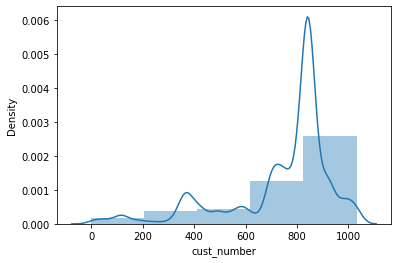

In [82]:
sns.distplot(df5['cust_number'],bins=5)

In [83]:
'''
    Our cust_number column is negatively skewed but we can't normalize it as it is a primary key for our dataset and its
    correlation with our targert variable is strongly negative.
'''

"\n    Our cust_number column is negatively skewed but we can't normalize it as it is a primary key for our dataset and its\n    correlation with our targert variable is strongly negative.\n"

<AxesSubplot:xlabel='delay', ylabel='Density'>

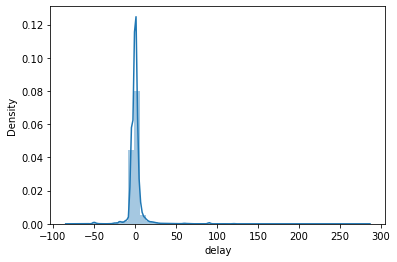

In [84]:
sns.distplot(df5['delay'])

In [85]:
## the above distribution is in the form of bell curve which means its a normal distribution ##

In [86]:
df5['delay'].kurtosis()

69.75721546375883

In [87]:
'''
    Positive value of kurtosis shows that delay column have a leptokurtic distribution
'''

'\n    Positive value of kurtosis shows that delay column have a leptokurtic distribution\n'

<AxesSubplot:xlabel='invoice_currency', ylabel='delay'>

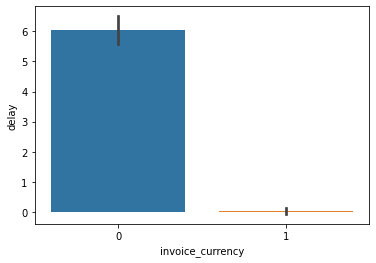

In [88]:
sns.barplot(x=df5['invoice_currency'],y=df5['delay'])

In [89]:
### invoice currency is a categorical variable and it contains 2 types of value and we can't considered it as a quasi constant
## as values % are in ratio 91:8
(df5.invoice_currency.value_counts())/df5.invoice_currency.count()*100

1    91.426275
0     8.573725
Name: invoice_currency, dtype: float64

In [92]:
correlation['delay']

business_code           -0.016247
cust_number             -0.068837
buisness_year                 NaN
doc_id                   0.184920
invoice_currency        -0.173344
document type            0.066451
total_open_amount        0.026299
cust_payment_terms      -0.178767
isOpen                        NaN
delay                    1.000000
due_week                -0.041762
due_month               -0.041986
due_year                -0.039082
doc_create_week         -0.031128
doc_create_month        -0.030424
doc_create_year         -0.003023
baseline_create_week    -0.030327
baseline_create_month   -0.029516
baseline_create_year    -0.001844
Name: delay, dtype: float64

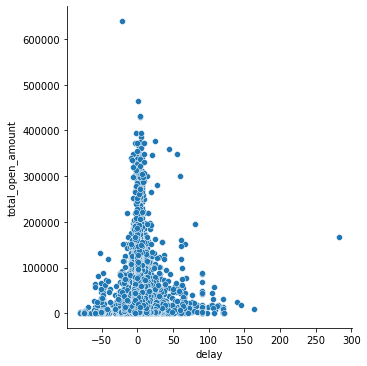

In [93]:
sns.relplot(y='total_open_amount',x='delay',data=df5)

<AxesSubplot:xlabel='document type', ylabel='delay'>

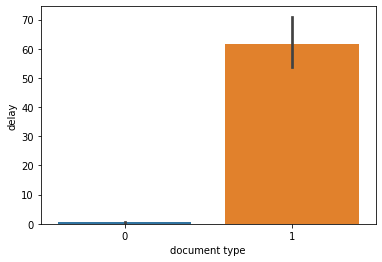

In [94]:
sns.barplot(x=df5['document type'],y=df5['delay'],data=df5)
    

In [95]:
((df5['document type'].value_counts())/(df5['document type'].count())*100).to_frame()

,document type
0,99.988916
1,0.011084


In [96]:
'''
    we can considered document type variable as a quasi constant as 99% of the values are same
'''

'\n    we can considered document type variable as a quasi constant as 99% of the values are same\n'

In [97]:
df5.drop('document type',axis=1,inplace=True)

In [98]:
### dropped document type from valid1 and valid2 too. ###
valid1.drop('document type',axis=1,inplace=True)
valid2.drop('document type',axis=1,inplace=True)

<AxesSubplot:xlabel='doc_create_week', ylabel='Density'>

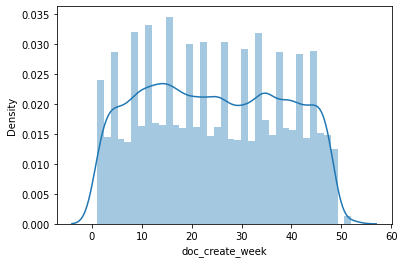

In [99]:
sns.distplot(df5['doc_create_week'])

<AxesSubplot:xlabel='cust_payment_terms', ylabel='delay'>

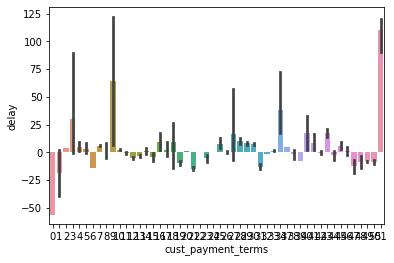

In [100]:
sns.barplot(x=df5['cust_payment_terms'],y=df5['delay'],data=df5)


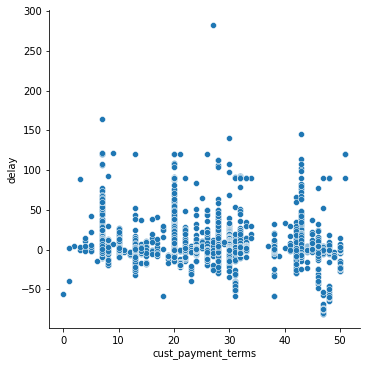

In [101]:
sns.relplot(x='cust_payment_terms',y='delay',data=df5)

In [102]:
df5.cust_payment_terms.value_counts()

20    15335
32    10041
7      3010
24     1290
22      929
30      760
26      729
33      697
13      619
31      584
10      332
28      247
42      237
43      205
21      171
50      146
48      107
47      104
46       89
49       76
38       54
23       40
8        36
14       31
45       28
15       27
25       26
5        19
27       15
44       14
17       13
19       11
16       10
41        7
18        7
4         7
12        6
11        5
34        4
3         3
51        3
40        2
9         2
29        2
1         2
37        1
6         1
39        1
2         1
0         1
Name: cust_payment_terms, dtype: int64

In [103]:
'''
    cust_payment_term have a negative correlation with delay 
'''

'\n    cust_payment_term have a negative correlation with delay \n'

In [104]:
df6=df5.copy()

In [105]:
df6.shape

(36087, 15)

In [106]:
valid1.shape

(3631, 15)

In [107]:
valid2.shape

(3759, 15)

In [108]:
#### Selection of features through Embedded Method ####

In [109]:
X_train=df6.drop(['delay'],axis=1)
y_train=df6['delay']
X_test=valid2.drop(['delay'],axis=1)
y_test=valid2['delay']

In [110]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=75, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [111]:
for index in range(1, 15):
    sel = RFE(RandomForestRegressor(n_estimators=75, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_train, y_train)

    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    features = X_train.columns[sel.get_support()]
    print("The Columns are :\n\n", features)
    print("\n\nLENGTH :", len(features))



    X_train_rfe = sel.transform(X_train)
    X_test_rfe = sel.transform(X_test)
    print('\nSelected Feature: ', index)
    run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The Columns are :

 Index(['total_open_amount'], dtype='object')


LENGTH : 1

Selected Feature:  1
Accuracy:  0.14152700186219738
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The Columns are :

 Index(['cust_number', 'total_open_amount'], dtype='object')


LENGTH : 2

Selected Feature:  2
Accuracy:  0.23969140728917265
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The Columns are :

 Index(['cust_number', 'total_open_amount', 'doc_create_week'], dtype='object')


LENGTH : 3

Selected Feature:  3
Accuracy:  0.226389997339718
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The Columns are :

 Index(['cust_number', 'tot

In [112]:
## From the above obsevation we found that taking 9 features for our model will give better accuracy ###

In [113]:
X1_train=df6[['cust_number', 'total_open_amount', 'cust_payment_terms', 'due_week','due_month', 'doc_create_week', 'doc_create_month','baseline_create_week', 'baseline_create_month']]
y1_train=df6['delay']

In [114]:
X1_test=valid2[['cust_number', 'total_open_amount', 'cust_payment_terms', 'due_week','due_month', 'doc_create_week', 'doc_create_month','baseline_create_week', 'baseline_create_month']]
y1_test=valid2['delay']

In [115]:
### HYPERPARAMETER TUNING ON VALIDATION SET 1 ###

In [116]:
X1_validation=valid1[['cust_number', 'total_open_amount', 'cust_payment_terms', 'due_week','due_month', 'doc_create_week', 'doc_create_month','baseline_create_week', 'baseline_create_month']]
y1_validation=valid1['delay']

In [117]:
%%time
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestRegressor



VALX_train, VALX_test, VALy_train, VALy_test = train_test_split(X1_validation, y1_validation, test_size = 0.2, random_state = 0,shuffle=False)

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 40, 80, 100, 110, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10, 12],
    'n_estimators': [50, 75, 100]
}




rf = RandomForestRegressor()# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(VALX_train, VALy_train)

grid_search.best_params_

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits
Wall time: 4min 26s


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 50}

In [118]:
## 3 lists for storing algo name ,mse_score and r2_score ##
Algos=[]
MSE_Scors=[]
R2_Scors=[]


In [119]:
## LINEAR REGRESSION ##

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
# Fitting Simple Linear Regression to the Training Set
Algos.append('Linear Regression')
clf = LinearRegression()
clf.fit(X1_train, y1_train)

# Predicting the Test Set Results
predicted = clf.predict(X1_test)


In [122]:
# Appending the Scores For Visualisation at a Later Part
MSE_Scors.append(mean_squared_error(y1_test, predicted))
R2_Scors.append(r2_score(y1_test, predicted))

In [123]:
### SVR ###

In [124]:
from sklearn.svm import SVR

In [125]:
# Fitting SVR to the Training Set
Algos.append('Support Vector Regression')
clf = SVR()
clf.fit(X1_train, y1_train)

# Predicting the Test Set Results
predicted = clf.predict(X1_test)

In [126]:
# Appending the Scores For Visualisation at a Later Part
MSE_Scors.append(mean_squared_error(y1_test, predicted))
R2_Scors.append(r2_score(y1_test, predicted))

In [127]:
### XGB ###

In [128]:
import xgboost as xgb

In [129]:
# Fitting XGBoost Regressor to the Training Set
Algos.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X1_train, y1_train)

# Predicting the Test Set Results
predicted = clf.predict(X1_test)

In [130]:
# Appending the Scores For Visualisation at a Later Part
MSE_Scors.append(mean_squared_error(y1_test, predicted))


In [131]:
R2_Scors.append(r2_score(y1_test, predicted))

In [132]:
### DECISION TREE REGRESSOR ###

In [133]:
from sklearn.tree import DecisionTreeRegressor

In [134]:
# Fitting Decision Tree to the Training Set
Algos.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(X1_train, y1_train)

# Predicting the Test Set Results
predicted = clf.predict(X1_test)

In [135]:
# Appending the Scores For Visualisation at a Later Part
MSE_Scors.append(mean_squared_error(y1_test, predicted))
R2_Scors.append(r2_score(y1_test, predicted))

In [136]:
### RANDOM FOREST REGRESSOR ###

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
# Fitting Random Forest Regressor Tree to the Training Set
Algos.append('Random Forest Regressor')
clf = RandomForestRegressor(bootstrap = True,max_depth = 80,max_features = 'auto',min_samples_leaf = 1,min_samples_split= 12, n_estimators=50,n_jobs=-1)
clf.fit(X1_train, y1_train)

# Predicting the Test Set Results
predicted = clf.predict(X1_test)

In [171]:
'''
Algos.pop(-1)
MSE_Scors.pop(-1)
R2_Scors.pop(-1)
'''


0.34705847685497604

In [172]:
# Appending the Scores For Visualisation at a Later Part
MSE_Scors.append(mean_squared_error(y1_test, predicted))
R2_Scors.append(r2_score(y1_test, predicted))

In [173]:
### Scorecard of different models in a single dataframe ###
pd.DataFrame(list(zip(Algos, MSE_Scors, R2_Scors)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,57.663930,-0.031356
1,Support Vector Regression,55.784038,0.002267
2,XGB Regressor,42.603963,0.238001
3,Decision Tree Regressor,87.904163,-0.572222
4,Random Forest Regressor,39.102487,0.300627


In [141]:
### Random forest regressor have the best MSE score and R2 score , so we can choose it for our model ##

                                        Prediction on test set

In [142]:
test.shape

(3812, 14)

In [143]:
test.isnull().sum()

business_code                0
cust_number                  0
clear_date                3812
buisness_year                0
doc_id                       0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
dtype: int64

In [144]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3812 entries, 46188 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           3812 non-null   object 
 1   cust_number             3812 non-null   object 
 2   clear_date              0 non-null      object 
 3   buisness_year           3812 non-null   int64  
 4   doc_id                  3812 non-null   int64  
 5   document_create_date.1  3812 non-null   int64  
 6   due_in_date             3812 non-null   int64  
 7   invoice_currency        3812 non-null   object 
 8   document type           3812 non-null   object 
 9   total_open_amount       3812 non-null   float64
 10  baseline_create_date    3812 non-null   int64  
 11  cust_payment_terms      3812 non-null   object 
 12  invoice_id              3812 non-null   float64
 13  isOpen                  3812 non-null   int64  
dtypes: float64(2), int64(6), object(6)


In [145]:
### changing datatype of date columns in str ###
test[['document_create_date.1','due_in_date','baseline_create_date','clear_date']]=test[['document_create_date.1','due_in_date','baseline_create_date','clear_date']].astype(str)

In [146]:
### converting date columns to datetime
test[['document_create_date.1','due_in_date','baseline_create_date']] = test[['document_create_date.1','due_in_date','baseline_create_date']].apply(pd.to_datetime,format='%Y%m%d')

In [147]:
test['business_code']=label_encoder.fit_transform(test['business_code'])
test['invoice_currency']=label_encoder.fit_transform(test['invoice_currency'])
test['document type']=label_encoder.fit_transform(test['document type'])
test['cust_payment_terms']=label_encoder.fit_transform(test['cust_payment_terms'])
test['cust_number']=label_encoder.fit_transform(test['cust_number'])

In [148]:
test['due_week']=test['due_in_date'].dt.week
test['due_month']=test['due_in_date'].dt.month
test['due_year']=test['due_in_date'].dt.year

test['doc_create_week']=test['document_create_date.1'].dt.week
test['doc_create_month']=test['document_create_date.1'].dt.month
test['doc_create_year']=test['document_create_date.1'].dt.year

test['baseline_create_week']=test['baseline_create_date'].dt.week
test['baseline_create_month']=test['baseline_create_date'].dt.month
test['baseline_create_year']=test['baseline_create_date'].dt.year

In [149]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3812 entries, 46188 to 49999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           3812 non-null   int32         
 1   cust_number             3812 non-null   int32         
 2   clear_date              3812 non-null   object        
 3   buisness_year           3812 non-null   int64         
 4   doc_id                  3812 non-null   int64         
 5   document_create_date.1  3812 non-null   datetime64[ns]
 6   due_in_date             3812 non-null   datetime64[ns]
 7   invoice_currency        3812 non-null   int32         
 8   document type           3812 non-null   int32         
 9   total_open_amount       3812 non-null   float64       
 10  baseline_create_date    3812 non-null   datetime64[ns]
 11  cust_payment_terms      3812 non-null   int32         
 12  invoice_id              3812 non-null   flo

In [150]:
#sorted the dataframe on the basis of column document_create_date.1
test2=test.sort_values('document_create_date.1')                                

In [151]:
test2.reset_index(drop=True,inplace=True)

In [152]:
xx1_test=test2[['cust_number', 'total_open_amount', 'cust_payment_terms', 'due_week','due_month', 'doc_create_week', 'doc_create_month','baseline_create_week', 'baseline_create_month']]

In [153]:
xx1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cust_number            3812 non-null   int32  
 1   total_open_amount      3812 non-null   float64
 2   cust_payment_terms     3812 non-null   int32  
 3   due_week               3812 non-null   int64  
 4   due_month              3812 non-null   int64  
 5   doc_create_week        3812 non-null   int64  
 6   doc_create_month       3812 non-null   int64  
 7   baseline_create_week   3812 non-null   int64  
 8   baseline_create_month  3812 non-null   int64  
dtypes: float64(1), int32(2), int64(6)
memory usage: 238.4 KB


In [174]:
# prediction on test_set
predicted = clf.predict(xx1_test)

In [175]:
predicted_values=np.round(predicted,decimals=0).astype(int)

In [176]:
len(predicted_values)

3812

In [177]:
predicted_values

array([ 9, 12,  1, ..., 11,  9, -1])

In [178]:
test2['delay']=predicted_values

    Predicted_values found for test set

In [179]:
test2.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,...,due_week,due_month,due_year,doc_create_week,doc_create_month,doc_create_year,baseline_create_week,baseline_create_month,baseline_create_year,delay
0,4,375,nan,2020,1991839865,2020-02-27,2020-04-12,1,0,14172.18,...,15,4,2020,9,2,2020,9,2,2020,9
1,1,31,nan,2020,1930577255,2020-02-27,2020-03-13,1,0,110256.59,...,11,3,2020,9,2,2020,9,2,2020,12
2,0,119,nan,2020,2960617074,2020-02-27,2020-03-09,0,0,30014.44,...,11,3,2020,9,2,2020,9,2,2020,1
3,1,291,nan,2020,1930573766,2020-02-27,2020-03-13,1,0,57654.10,...,11,3,2020,9,2,2020,9,2,2020,-13
4,1,220,nan,2020,1930576465,2020-02-27,2020-03-13,1,0,67573.77,...,11,3,2020,9,2,2020,9,2,2020,2


In [180]:
test_6=test2.copy()

In [181]:
### using cut function for bucketization ###
test_6['aging_bucket']=pd.cut(test_6['delay'],bins=[0,15,31,45,60])

In [182]:
test_6['aging_bucket']=test_6['aging_bucket'].astype(str)

In [183]:
## if delay is less than 0 or greater than 0 or equal to 0 dividing them into correct buckets ##
for i in range(len(test_6.index)):
    if test_6['delay'][i]<0:
        test_6['aging_bucket'][i]='< 0'
    elif test_6['delay'][i]>=60:
        test_6['aging_bucket'][i]='>= 60'
    elif test_6['delay'][i]==0:
        test_6['aging_bucket'][i]='0'

In [184]:
test_6['aging_bucket']=test_6['aging_bucket'].apply(lambda x : str(x)+ " days")

In [185]:
l=list(test_6['delay'])

In [186]:
## obtaining clear_date from due_in_date and delay ##
for i in range(len(test_6.index)):
    test_6['clear_date'][i]=test_6['due_in_date'][i]+datetime.timedelta(l[i])

In [187]:
test_6[['due_in_date','clear_date','delay','aging_bucket']].head(10)

,due_in_date,clear_date,delay,aging_bucket
0,2020-04-12,2020-04-21 00:00:00,9,"(0, 15] days"
1,2020-03-13,2020-03-25 00:00:00,12,"(0, 15] days"
2,2020-03-09,2020-03-10 00:00:00,1,"(0, 15] days"
3,2020-03-13,2020-02-29 00:00:00,-13,< 0 days
4,2020-03-13,2020-03-15 00:00:00,2,"(0, 15] days"
5,2020-02-27,2020-03-03 00:00:00,5,"(0, 15] days"
6,2020-03-13,2020-02-29 00:00:00,-13,< 0 days
7,2020-03-13,2020-03-03 00:00:00,-10,< 0 days
8,2020-03-13,2020-03-09 00:00:00,-4,< 0 days
9,2020-03-13,2020-03-20 00:00:00,7,"(0, 15] days"


In [188]:
test_6[['due_in_date','clear_date','delay','aging_bucket']].tail(10)

,due_in_date,clear_date,delay,aging_bucket
3802,2020-05-27,2020-05-11 00:00:00,-16,< 0 days
3803,2020-05-27,2020-05-13 00:00:00,-14,< 0 days
3804,2020-05-27,2020-05-11 00:00:00,-16,< 0 days
3805,2020-05-27,2020-05-11 00:00:00,-16,< 0 days
3806,2020-05-28,2020-05-27 00:00:00,-1,< 0 days
3807,2020-05-13,2020-05-22 00:00:00,9,"(0, 15] days"
3808,2020-05-28,2020-06-03 00:00:00,6,"(0, 15] days"
3809,2020-05-24,2020-06-04 00:00:00,11,"(0, 15] days"
3810,2020-05-29,2020-06-07 00:00:00,9,"(0, 15] days"
3811,2020-05-30,2020-05-29 00:00:00,-1,< 0 days


In [169]:
test_6.sample(20)

,business_code,cust_number,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,...,due_month,due_year,doc_create_week,doc_create_month,doc_create_year,baseline_create_week,baseline_create_month,baseline_create_year,delay,aging_bucket
2365,1,31,2020-04-30 00:00:00,2020,1930751581,2020-04-07,2020-04-22,1,0,16386.79,...,4,2020,15,4,2020,15,4,2020,8,"(0, 15] days"
2765,1,322,2020-05-07 00:00:00,2020,1930791336,2020-04-16,2020-05-01,1,0,13137.47,...,5,2020,16,4,2020,16,4,2020,6,"(0, 15] days"
1729,1,263,2020-04-10 00:00:00,2020,1930705770,2020-03-27,2020-04-11,1,0,31966.59,...,4,2020,13,3,2020,13,3,2020,-1,< 0 days
3766,1,291,2020-05-15 00:00:00,2020,1930881898,2020-05-09,2020-05-24,1,0,1626.33,...,5,2020,19,5,2020,19,5,2020,-9,< 0 days
1145,1,239,2020-04-03 00:00:00,2020,1930667615,2020-03-19,2020-04-03,1,0,557.03,...,4,2020,12,3,2020,12,3,2020,0,0 days
1162,1,370,2020-04-03 00:00:00,2020,1930661292,2020-03-19,2020-04-03,1,0,2739.02,...,4,2020,12,3,2020,12,3,2020,0,0 days
3226,0,93,2020-05-09 00:00:00,2020,2960630647,2020-04-26,2020-05-16,0,0,41740.37,...,5,2020,17,4,2020,19,5,2020,-7,< 0 days
1510,1,346,2020-03-24 00:00:00,2020,1930689946,2020-03-24,2020-03-26,1,0,8756.08,...,3,2020,13,3,2020,12,3,2020,-2,< 0 days
3551,1,291,2020-05-09 00:00:00,2020,1930854374,2020-05-04,2020-05-19,1,0,16936.20,...,5,2020,19,5,2020,19,5,2020,-10,< 0 days
352,1,291,2020-03-09 00:00:00,2020,1930593001,2020-03-04,2020-03-19,1,0,4204.34,...,3,2020,10,3,2020,10,3,2020,-10,< 0 days


                                   #####                                   #####